# German Electricity Data :electric_plug:

- Data Source: [SMARD Web Portal](https://www.smard.de/) 
- Task: forecasting \(using the past to predict the future\)
- Language: [julia](https://julialang.org)

## First steps:

- load the data \(with appropriate column types\) :heavy_check_mark: 
- split the data into train/val/test sets
- plot the time series \(at different temporal resolution\)
- calculate the mean production per month
- is there a seasonal pattern \(what kinds of seasonalities\)
- make a prediction for the validation set
- evaluate the quality of the prediction



In [3]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     


── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [4]:
set.seed(42)
"A B C D E F" %>%  str_split(" ") %>% unlist %>% sample %>% str_c(collapse=" → ")

[1] "A → E → F → D → B → C"

## 1. Data loading

- load the hourly data from the file `Realisierte_Erzeugung_201501010000_202305301300_Stunde.csv` as a table into R :heavy_check_mark:
- make sure, that data is interpreted and typed correctly :heavy_check_mark:
- clean header names :heavy_check_mark:
- create column `Time` containing the combined info from `Datum` and `Anfang`



In [5]:
data <- read_csv2(
    "../data_dojo_22/Realisierte_Erzeugung_201501010000_202305301300_Stunde.csv",
    col_types=cols(`Datum` = col_date(
"%d.%m.%Y")),
    na="-",
    locale = locale(tz = "Europe/Berlin")
)

ℹ Using "','" as decimal and "'.'" as grouping mark. Use `read_delim()` for more control.



In [6]:
colnames(data) <- colnames(data) %>% str_remove(" \\[.*") %>% str_replace(" ","_")

In [7]:
data

Datum,Anfang,Ende,Biomasse,Wasserkraft,Wind_Offshore,Wind_Onshore,Photovoltaik,Sonstige_Erneuerbare,Kernenergie,Braunkohle,Steinkohle,Erdgas,Pumpspeicher,Sonstige_Konventionelle
<date>,<time>,<time>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2015-01-01,00:00:00,01:00:00,4024.25,1158.25,516.50,8128.00,0.00,133.00,10710.50,15687.25,3219.75,1226.25,1525.75,4909.25
2015-01-01,01:00:00,02:00:00,3982.75,1188.00,516.25,8297.50,0.00,122.50,11086.25,15321.75,2351.25,870.75,1079.25,4932.75
2015-01-01,02:00:00,03:00:00,4019.50,1139.25,514.00,8540.00,0.00,93.00,11026.25,14817.50,2227.00,809.50,787.00,5041.75
2015-01-01,03:00:00,04:00:00,4040.75,1122.50,517.75,8552.00,0.00,86.50,11027.75,14075.00,2339.75,821.00,287.75,5084.00
2015-01-01,04:00:00,05:00:00,4037.75,1112.00,519.75,8643.50,0.00,86.50,10962.25,14115.00,2461.50,831.25,346.75,5070.75
2015-01-01,05:00:00,06:00:00,4028.25,1107.75,520.00,8711.75,0.00,86.75,10696.00,13474.25,2217.75,851.00,765.50,5096.75
2015-01-01,06:00:00,07:00:00,4013.25,1111.75,521.50,9167.25,0.00,87.00,10299.50,12403.75,2373.25,868.25,414.50,5153.00
2015-01-01,07:00:00,08:00:00,4012.75,1113.75,520.25,9811.00,0.00,87.00,10035.25,12062.50,2491.00,876.00,582.50,5161.00
2015-01-01,08:00:00,09:00:00,3999.75,1107.50,525.25,9683.00,53.00,87.00,10245.75,12405.00,2530.25,888.25,750.50,5393.50


### Todo 2<sup>nd</sup> session
- Create `Time` column
- Split into training/validation/test set
- Plot the training set with hourly resolution
- Aggregate by day/month
- Plot aggregated data

In [8]:
library(tsibble)


Attaching package: ‘tsibble’




The following object is masked from ‘package:lubridate’:

    interval




The following objects are masked from ‘package:base’:

    intersect, setdiff, union




In [9]:
data <- data %>% mutate(Time = force_tz(Datum, "Europe/Berlin") + hours(hour(Anfang)))

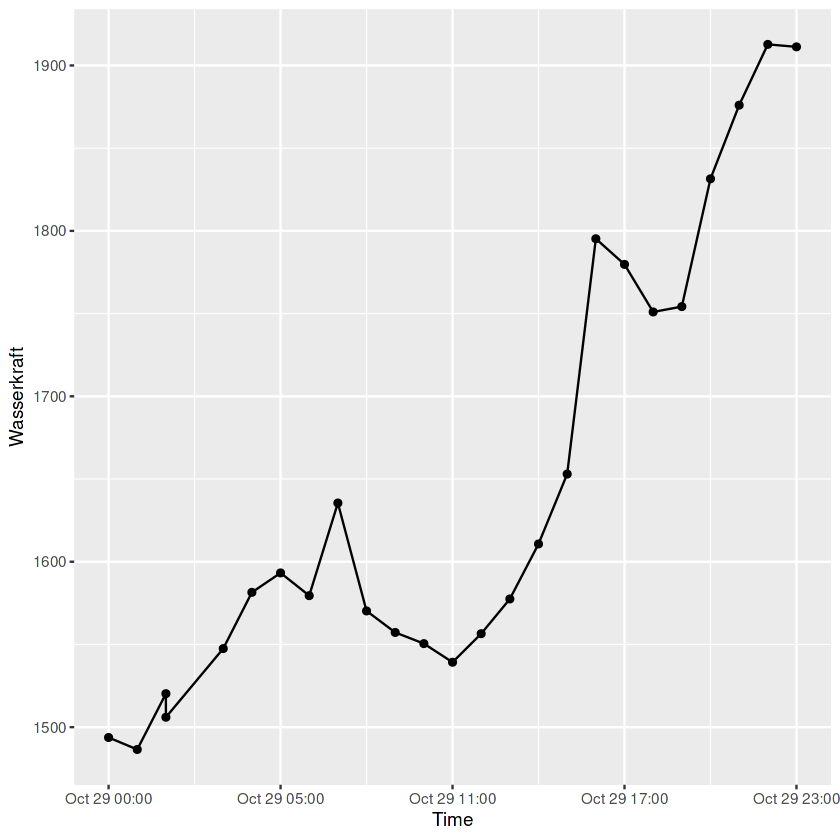

In [10]:
data %>%
    filter(day(Time)==29, month(Time)==10, year(Time)==2017) %>%
    ggplot(aes(x=Time, y=Wasserkraft)) +
        geom_line() + geom_point()

In [11]:
data$Time[2]

[1] "2015-01-01 01:00:00 CET"

In [12]:
duplicates <- data %>% count(Time, sort=T) %>% filter(n>1) %>% pull(Time)

In [13]:
data %>% filter(Time %in% duplicates)

Datum,Anfang,Ende,Biomasse,Wasserkraft,Wind_Offshore,Wind_Onshore,Photovoltaik,Sonstige_Erneuerbare,Kernenergie,Braunkohle,Steinkohle,Erdgas,Pumpspeicher,Sonstige_Konventionelle,Time
<date>,<time>,<time>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2015-10-25,02:00:00,03:00:00,4000.00,1249.25,1453.50,5987.25,0,93.00,10661.50,16756.25,4060.50,1106.50,46.50,12028.75,2015-10-25 02:00:00
2015-10-25,02:00:00,03:00:00,4003.00,1267.00,1501.75,5896.75,0,93.00,10616.50,16659.00,3996.25,1071.00,39.00,11961.75,2015-10-25 02:00:00
2016-10-30,02:00:00,03:00:00,4482.00,1482.00,991.25,7219.25,0,174.25,9788.25,14254.25,4475.00,1541.50,195.50,4481.25,2016-10-30 02:00:00
2016-10-30,02:00:00,03:00:00,4477.75,1461.00,889.00,7066.75,0,174.00,9731.25,14469.00,4451.50,1538.25,123.00,4524.00,2016-10-30 02:00:00
2017-10-29,02:00:00,03:00:00,4393.75,1520.25,1484.50,26743.00,0,165.50,5861.00,5475.25,1209.75,1448.75,132.75,4346.25,2017-10-29 02:00:00
2017-10-29,02:00:00,03:00:00,4389.25,1506.00,1026.50,26743.00,0,165.75,5834.25,5349.75,1197.50,1452.00,93.25,4331.50,2017-10-29 02:00:00
2018-10-28,02:00:00,03:00:00,4722.50,1236.25,2462.00,10943.75,0,147.00,8010.25,15835.25,2588.25,3305.00,79.00,1325.50,2018-10-28 02:00:00
2018-10-28,02:00:00,03:00:00,4724.00,1230.75,2247.75,11422.00,0,147.00,8011.25,15713.25,2551.75,3337.50,0.00,1316.50,2018-10-28 02:00:00
2019-10-27,02:00:00,03:00:00,4584.00,1269.25,4516.50,28084.25,0,160.00,6842.25,4992.50,1279.25,2415.75,1643.50,1028.50,2019-10-27 02:00:00


In [14]:
(ymd("2015-10-25",tz = "Europe/Berlin") + 4 * 60 * 60)

[1] "2015-10-25 03:00:00 CET"

In [15]:
data <- data %>% group_by(Time) %>% mutate(dupl = row_number()) %>% mutate(Time = if_else(dupl==2, Time + 60*60, Time)) %>% ungroup

In [16]:
data %>% filter(Time %in% duplicates)

Datum,Anfang,Ende,Biomasse,Wasserkraft,Wind_Offshore,Wind_Onshore,Photovoltaik,Sonstige_Erneuerbare,Kernenergie,Braunkohle,Steinkohle,Erdgas,Pumpspeicher,Sonstige_Konventionelle,Time,dupl
<date>,<time>,<time>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>,<int>
2015-10-25,02:00:00,03:00:00,4000.00,1249.25,1453.50,5987.25,0,93.00,10661.50,16756.25,4060.50,1106.50,46.50,12028.75,2015-10-25 02:00:00,1
2015-10-25,02:00:00,03:00:00,4003.00,1267.00,1501.75,5896.75,0,93.00,10616.50,16659.00,3996.25,1071.00,39.00,11961.75,2015-10-25 02:00:00,2
2016-10-30,02:00:00,03:00:00,4482.00,1482.00,991.25,7219.25,0,174.25,9788.25,14254.25,4475.00,1541.50,195.50,4481.25,2016-10-30 02:00:00,1
2016-10-30,02:00:00,03:00:00,4477.75,1461.00,889.00,7066.75,0,174.00,9731.25,14469.00,4451.50,1538.25,123.00,4524.00,2016-10-30 02:00:00,2
2017-10-29,02:00:00,03:00:00,4393.75,1520.25,1484.50,26743.00,0,165.50,5861.00,5475.25,1209.75,1448.75,132.75,4346.25,2017-10-29 02:00:00,1
2017-10-29,02:00:00,03:00:00,4389.25,1506.00,1026.50,26743.00,0,165.75,5834.25,5349.75,1197.50,1452.00,93.25,4331.50,2017-10-29 02:00:00,2
2018-10-28,02:00:00,03:00:00,4722.50,1236.25,2462.00,10943.75,0,147.00,8010.25,15835.25,2588.25,3305.00,79.00,1325.50,2018-10-28 02:00:00,1
2018-10-28,02:00:00,03:00:00,4724.00,1230.75,2247.75,11422.00,0,147.00,8011.25,15713.25,2551.75,3337.50,0.00,1316.50,2018-10-28 02:00:00,2
2019-10-27,02:00:00,03:00:00,4584.00,1269.25,4516.50,28084.25,0,160.00,6842.25,4992.50,1279.25,2415.75,1643.50,1028.50,2019-10-27 02:00:00,1


In [17]:
data_ts <- data %>% as_tsibble(index=Time)

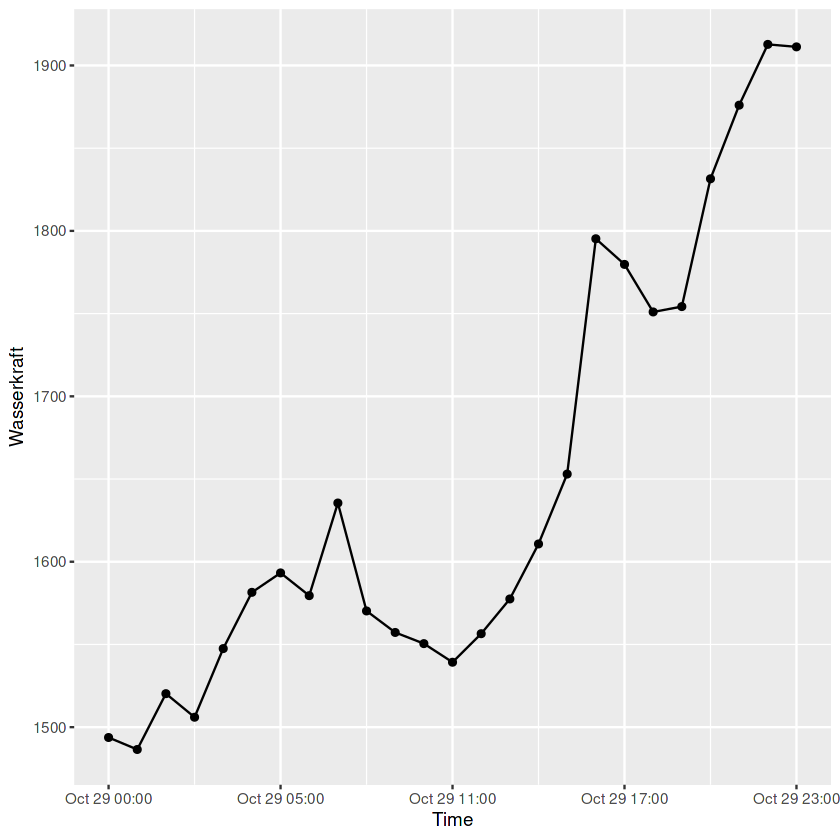

In [18]:
data %>%
    filter(day(Time)==29, month(Time)==10, year(Time)==2017) %>%
    ggplot(aes(x=Time, y=Wasserkraft)) +
        geom_line() + geom_point()